Total Complaints Detected: 24561


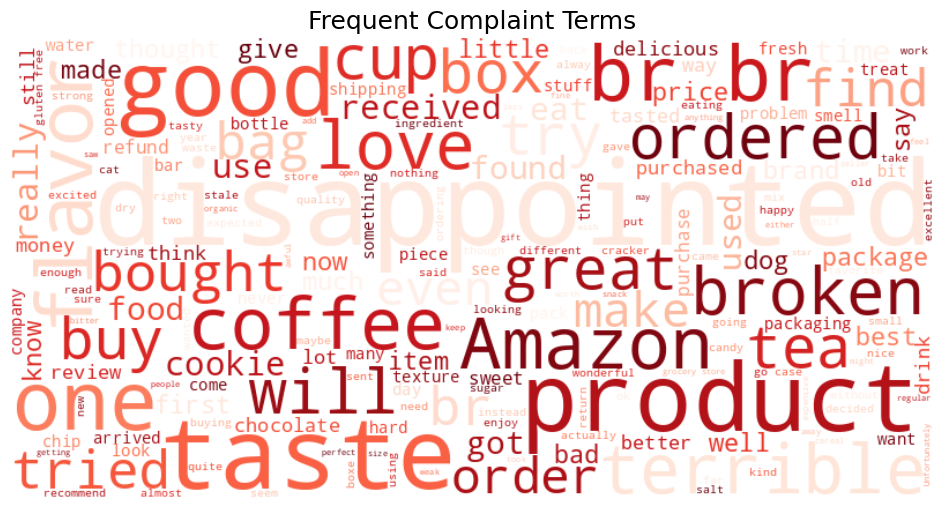

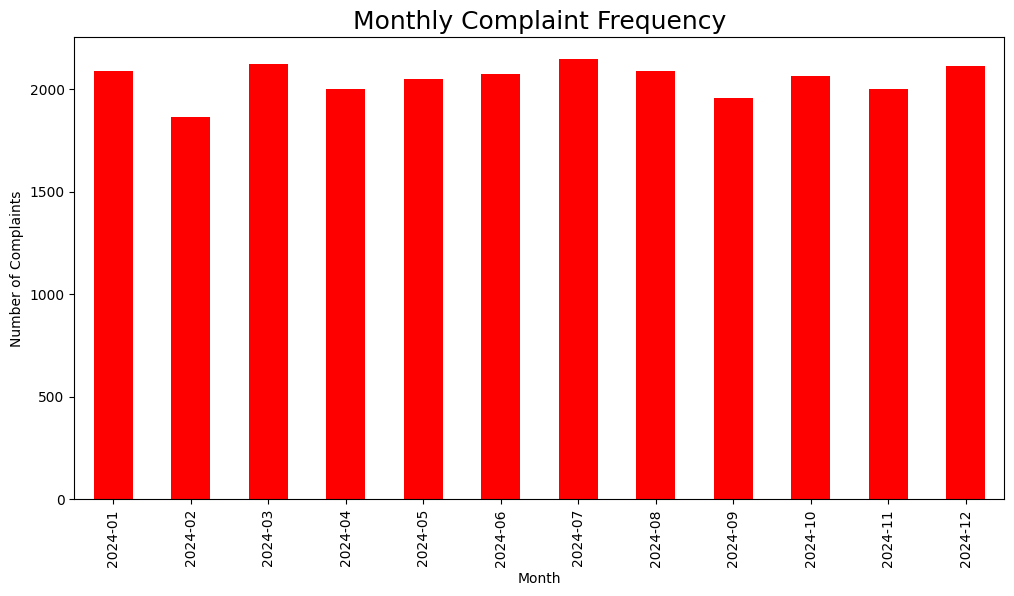

In [4]:
# ================================================================
# 6. Complaint Detection and Trend Visualization
# ================================================================
# Purpose:
# - Detect complaint reviews mentioning issues
# - Visualize frequent complaint keywords
# ================================================================

# STEP 1: Imports
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# STEP 2: Load your reviews
df = pd.read_csv('/home/mukhopadhyayd/Customer Sentiment/data/processed/reviews_with_sentiment.csv')  # already created earlier

# STEP 3: Preprocessing
# Drop missing reviews and convert everything to string
reviews = df['full_review'].dropna().astype(str).tolist()

# STEP 4: Detect Complaints
def detect_complaints(reviews):
    keywords = ['not good', 'refund', 'broken', 'terrible', 'disappointed']
    # Only process if review is a string
    return [r for r in reviews if isinstance(r, str) and any(k in r.lower() for k in keywords)]

# Apply function
complaints = detect_complaints(reviews)

# STEP 5: Plot WordCloud for Complaints
def plot_wordcloud(reviews):
    """Plot a WordCloud from a list of reviews."""
    text = " ".join(reviews)
    wc = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(text)
    plt.figure(figsize=(12, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title('Frequent Complaint Terms', fontsize=18)
    plt.show()

# STEP 6: Plot Complaint Trends over Time
def plot_complaint_trends(complaints):
    """Simulate complaint dates and plot monthly complaint trends."""
    simulated_dates = pd.to_datetime(np.random.choice(
        pd.date_range('2024-01-01', '2024-12-31'), len(complaints)
    ))
    df_simulated = pd.DataFrame({'date': simulated_dates})
    df_simulated['month'] = df_simulated['date'].dt.to_period('M')
    df_simulated['month'].value_counts().sort_index().plot(kind='bar', color='red', figsize=(12,6))
    plt.title('Monthly Complaint Frequency', fontsize=18)
    plt.ylabel('Number of Complaints')
    plt.xlabel('Month')
    plt.show()

# STEP 7: Run and Visualize
print(f"Total Complaints Detected: {len(complaints)}")
plot_wordcloud(complaints)
plot_complaint_trends(complaints)
